In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


In [3]:
# importing libraries for KNN

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [5]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#handling missing values
#embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
#cabin
df['Deck'] = df['Cabin']
df['Deck'] = df['Deck'].str.slice(0,1)
df['Deck'].fillna('X', inplace = True)

In [8]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S,X
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S,X
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q,X


In [9]:
df = pd.get_dummies(df, prefix = ['Embarked', 'Deck'], columns = ['Embarked', 'Deck'])


In [10]:
df.drop(['Name', 'Cabin'], axis=1, inplace = True)

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

In [14]:
df.drop(['Ticket'], axis = 1, inplace = True)

In [15]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Family
886,887,0,2,1,27.0,13.00,0,0,1,0,0,0,0,0,0,0,0,1,1
887,888,1,1,0,19.0,30.00,0,0,1,0,1,0,0,0,0,0,0,0,1
888,889,0,3,0,28.0,23.45,0,0,1,0,0,0,0,0,0,0,0,1,4
889,890,1,1,1,26.0,30.00,1,0,0,0,0,1,0,0,0,0,0,0,1
890,891,0,3,1,32.0,7.75,0,1,0,0,0,0,0,0,0,0,0,1,1


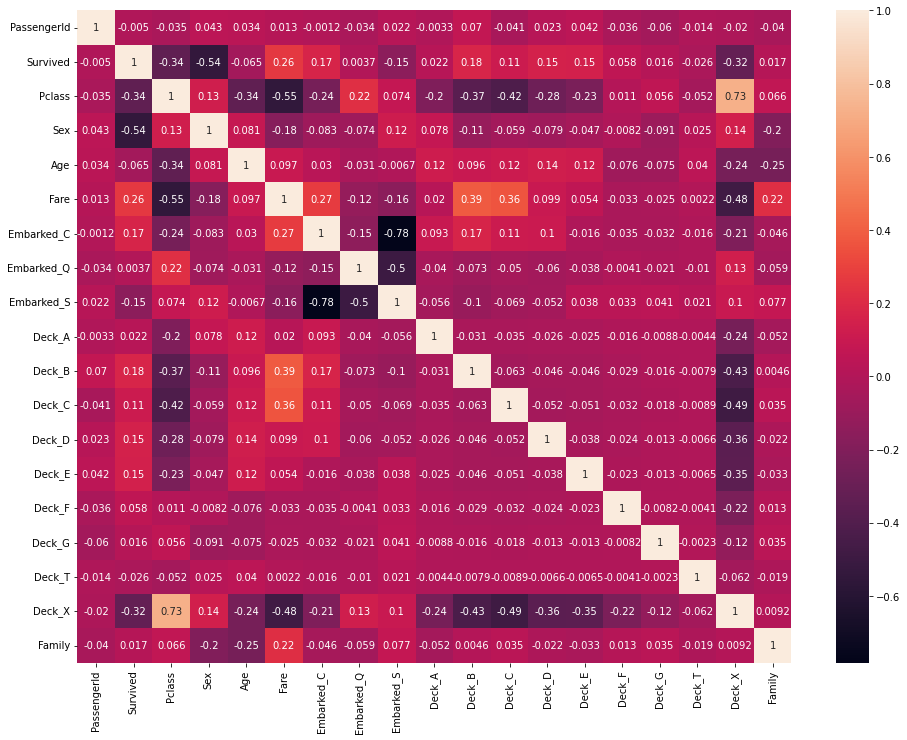

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [17]:
X = df[['Pclass', 'Sex', 'Age', 'Family','Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_X']]
y = df[['Survived']]

In [18]:
y = df.iloc[:, 1:2].values

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_X', 'Family'],
      dtype='object')

In [20]:
#split dataset by 0.25 for test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [21]:
#KNN
final_scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize = True) * float(100)
    final_scores.append(acc)
    print('\n accuracy for k = %d = %d' %(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k+1)


 accuracy for k = 1 = 70

 accuracy for k = 2 = 70

 accuracy for k = 3 = 73

 accuracy for k = 4 = 69

 accuracy for k = 5 = 71

 accuracy for k = 6 = 74

 accuracy for k = 7 = 75

 accuracy for k = 8 = 73

 accuracy for k = 9 = 73

 accuracy for k = 10 = 73

 accuracy for k = 11 = 73

 accuracy for k = 12 = 71

 accuracy for k = 13 = 73

 accuracy for k = 14 = 72

 accuracy for k = 15 = 72

 accuracy for k = 16 = 71

 accuracy for k = 17 = 71

 accuracy for k = 18 = 72

 accuracy for k = 19 = 73
7


In [35]:
def model_score(key):
    print(key)


    x = df.iloc[:, 1:]
    if(len(key) > 0):
        x = x.drop(columns=[key])
        x = x.values
        
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


    # k-value
    error_rate=[]
    for i in range (1,31):
        clf=KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train,y_train.ravel())
        predict_i=clf.predict(x_test)
        error_rate.append(1 - accuracy_score(y_test, predict_i))
    k_value = error_rate.index(min(error_rate)) + 1


    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k_value)))



    dict = {}
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
        dict[name] = [cv_results.mean(), cv_results.std()]

    return dict

In [36]:
results = {}

In [37]:
for key in df.columns[1:]:
    results[key] = pd.DataFrame(model_score(key))

Survived
Pclass
Sex
Age
Fare
Embarked_C
Embarked_Q
Embarked_S
Deck_A
Deck_B
Deck_C
Deck_D
Deck_E
Deck_F
Deck_G
Deck_T
Deck_X
Family


In [101]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [38]:
results

{'Survived':          LR       LDA       KNN
 0  0.810568  0.808981  0.687006
 1  0.008739  0.003577  0.034296,
 'Pclass':     LR       LDA       KNN
 0  1.0  0.807471  0.765652
 1  0.0  0.036119  0.018524,
 'Sex':     LR       LDA       KNN
 0  1.0  0.698323  0.759135
 1  0.0  0.038429  0.041606,
 'Age':     LR       LDA       KNN
 0  1.0  0.792852  0.884452
 1  0.0  0.025772  0.016405,
 'Fare':     LR       LDA       KNN
 0  1.0  0.799368  0.865187
 1  0.0  0.021974  0.034446,
 'Embarked_C':     LR       LDA       KNN
 0  1.0  0.799394  0.669432
 1  0.0  0.044577  0.037610,
 'Embarked_Q':     LR       LDA       KNN
 0  1.0  0.808968  0.783303
 1  0.0  0.018730  0.038591,
 'Embarked_S':     LR       LDA       KNN
 0  1.0  0.818555  0.770400
 1  0.0  0.017966  0.033272,
 'Deck_A':     LR       LDA       KNN
 0  1.0  0.791226  0.756129
 1  0.0  0.029497  0.041834,
 'Deck_B':     LR       LDA       KNN
 0  1.0  0.807497  0.770361
 1  0.0  0.037111  0.052546,
 'Deck_C':     LR       LDA  

In [39]:
full_dataset_result = pd.DataFrame(model_score(''))
full_dataset_result

,LR,LDA,KNN
0,1.0,0.804181,0.711019
1,0.0,0.013841,0.016237


In [40]:
results['Pclass']

,LR,LDA,KNN
0,1.0,0.807471,0.765652
1,0.0,0.036119,0.018524
